# Pima Indians Diabetes

In [1]:
import os
import io
import sys
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
% matplotlib inline
py.init_notebook_mode()

# sns.set(style="whitegrid")

random_state = 42

## Datensatz laden

Quelle: [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [2]:
df = pd.read_csv('../datasets/pima-indians-diabetes.csv')

# Übersicht

In [3]:
df.head(n=5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Informationen zum Datensatz

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Outcome:** Class variable (0 or 1)


## Beschreibende Statistik zum Datensatz

In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Visualisierung

## Verteilung der Klassen

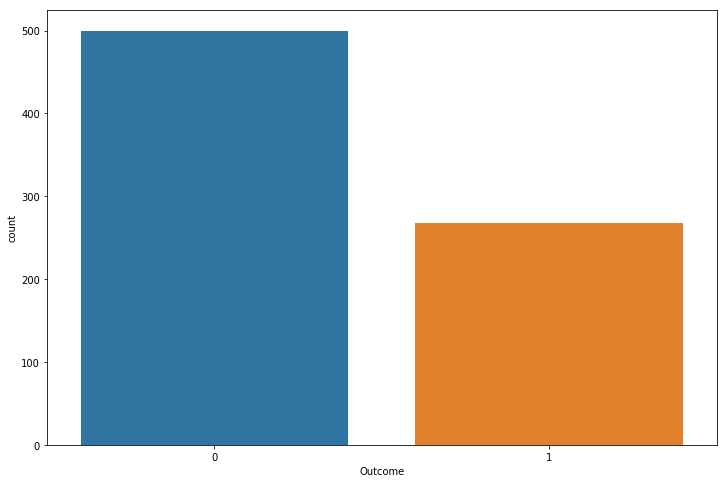

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Outcome', data=df);

## Verteilung der Werte pro Merkmal

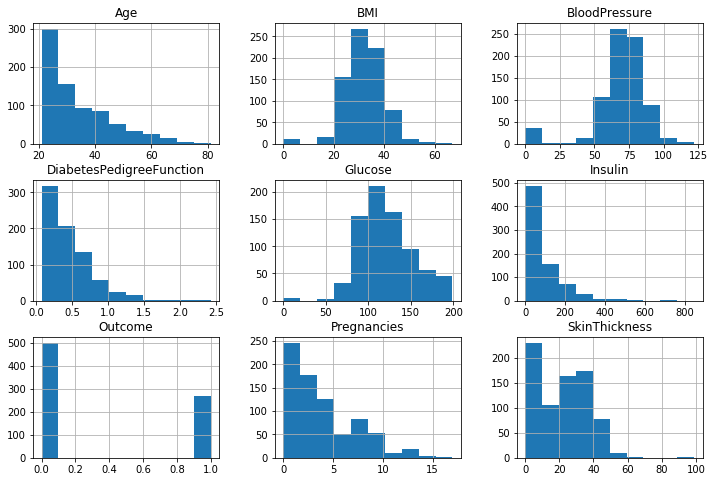

In [6]:
df.hist(figsize=(12, 8));

## Beziehung zwischen den einzelnen Merkmalen

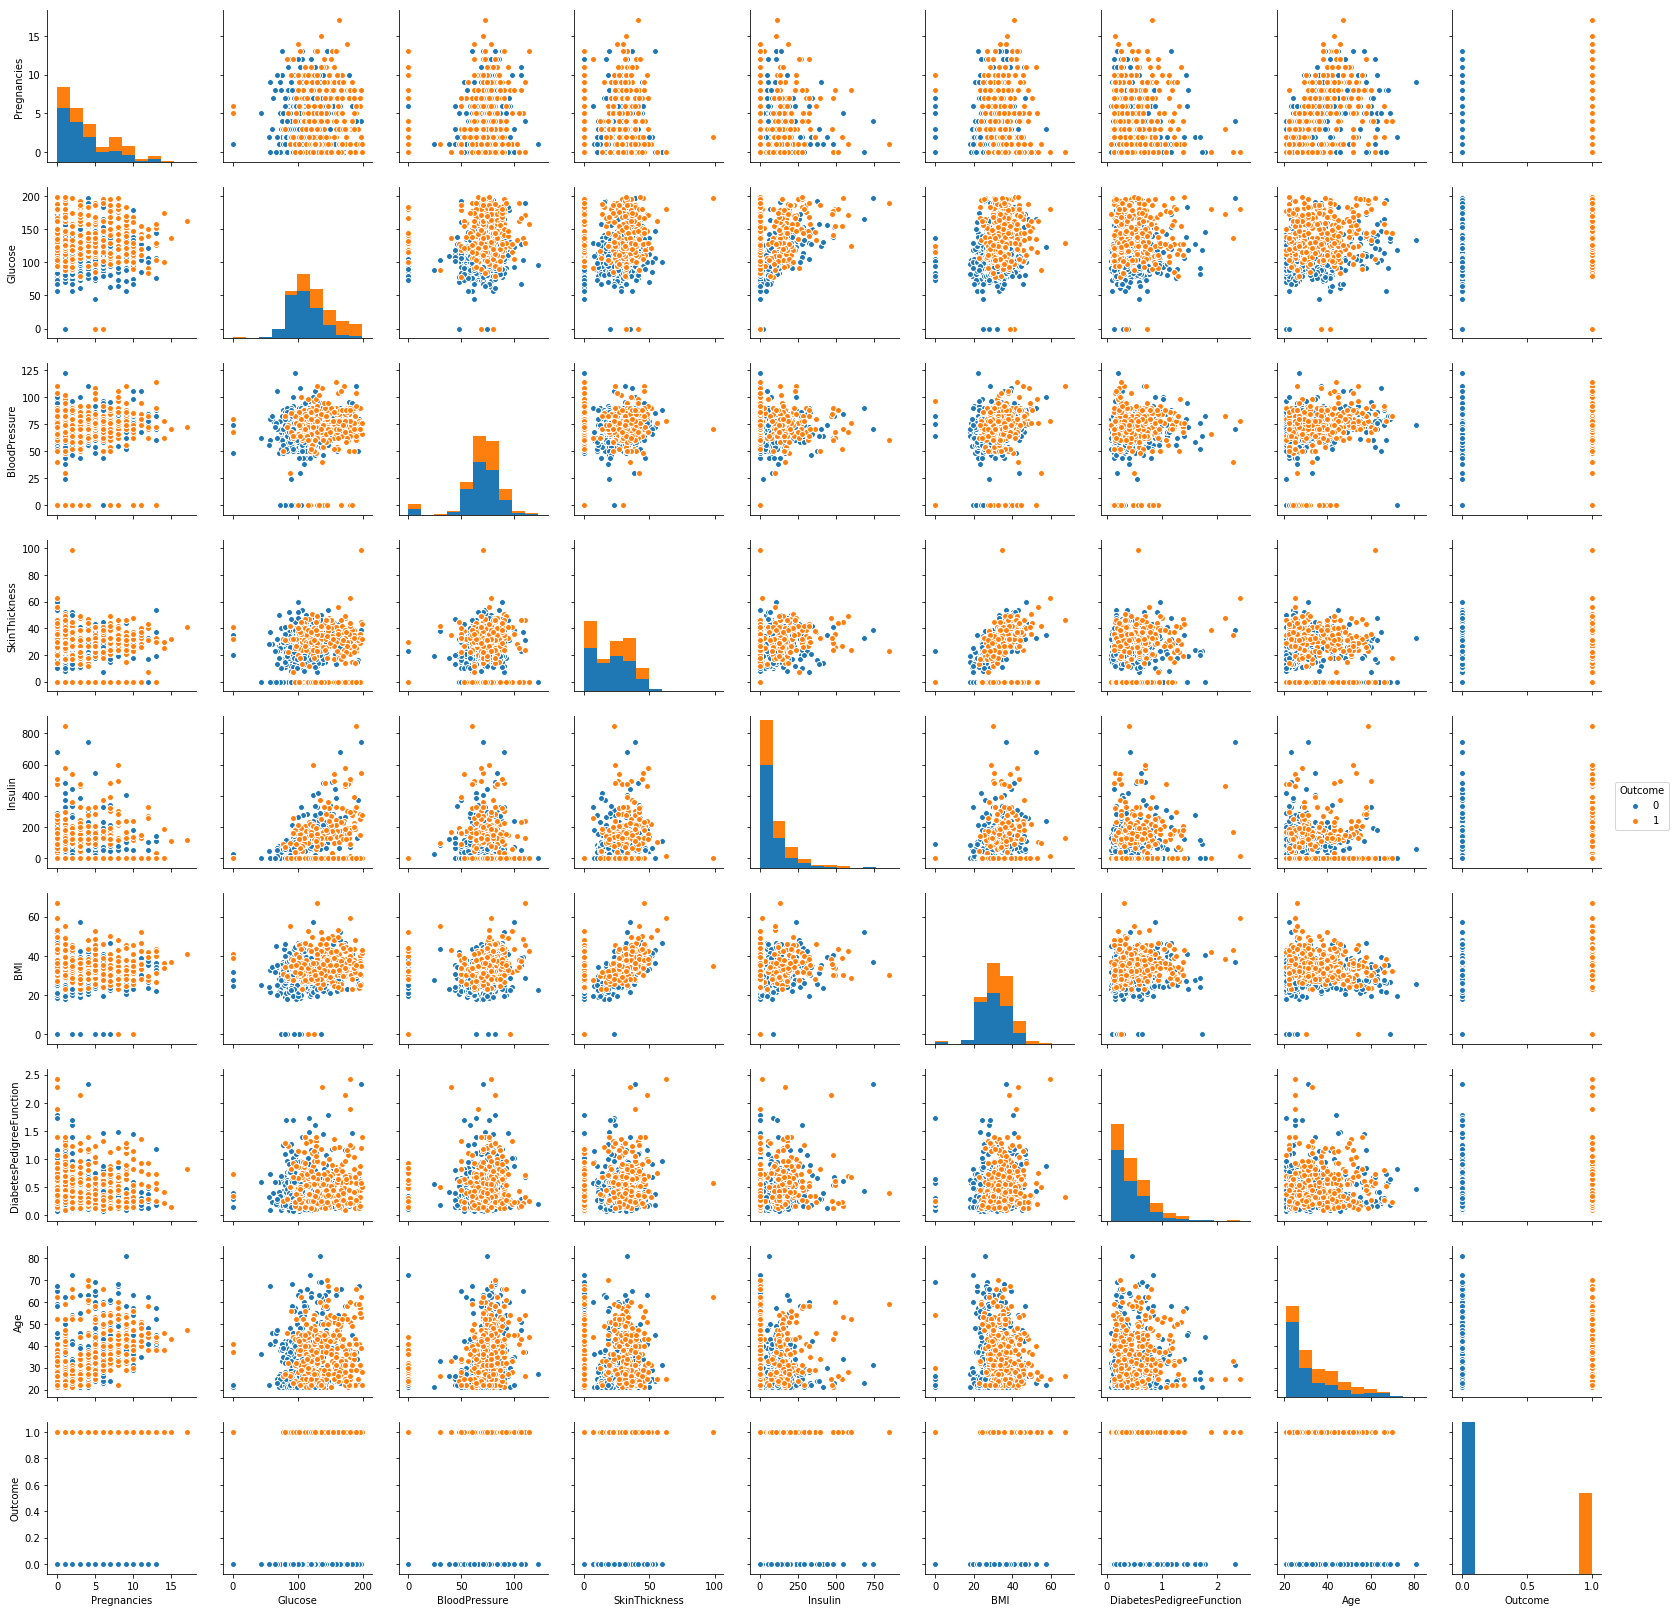

In [7]:
sns.pairplot(df, hue='Outcome');

## Darstellung mittels Parallelen Koordinaten

In [8]:
dimensions = []
for column in df.drop('Outcome', axis=1).columns:
    dimensions.append(dict(label=column, values=df[column]))

data = [
    go.Parcoords(
        line=dict(color=df['Outcome'],
                  colorscale=[[0, 'rgb(228,26,28)'], [1, 'rgb(77,175,74)']]),
        dimensions=dimensions
    )
]

layout = go.Layout(
    plot_bgcolor = '#E5E5E5',
    paper_bgcolor = '#E5E5E5'
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

## Korrelation zwischen den Merkmalen

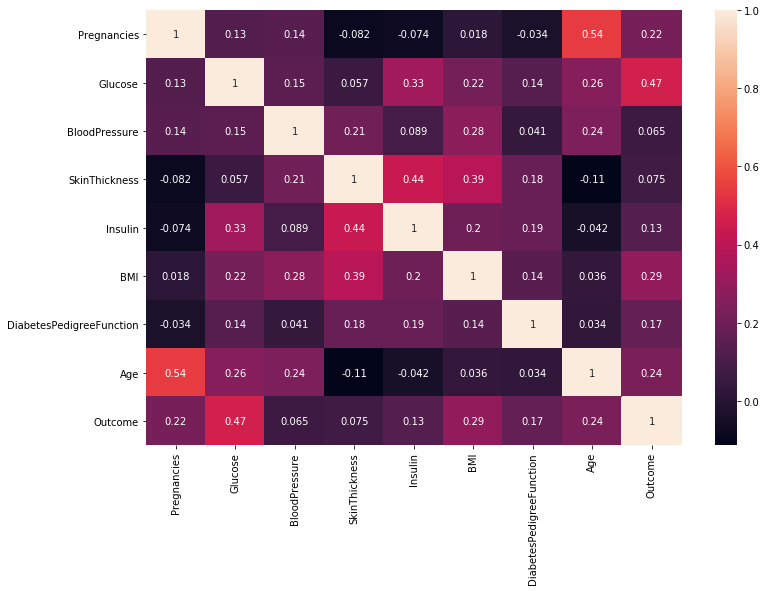

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True);

# Vorverarbeitung (Pre-Processing)

## Behandlung von fehlenden Werten

### Null-Werte ersetzen

In [10]:
column_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in column_list:
    df[column].replace(to_replace=0, value=np.NaN, inplace=True)

### Anzahl der fehlenden Werte ermitteln

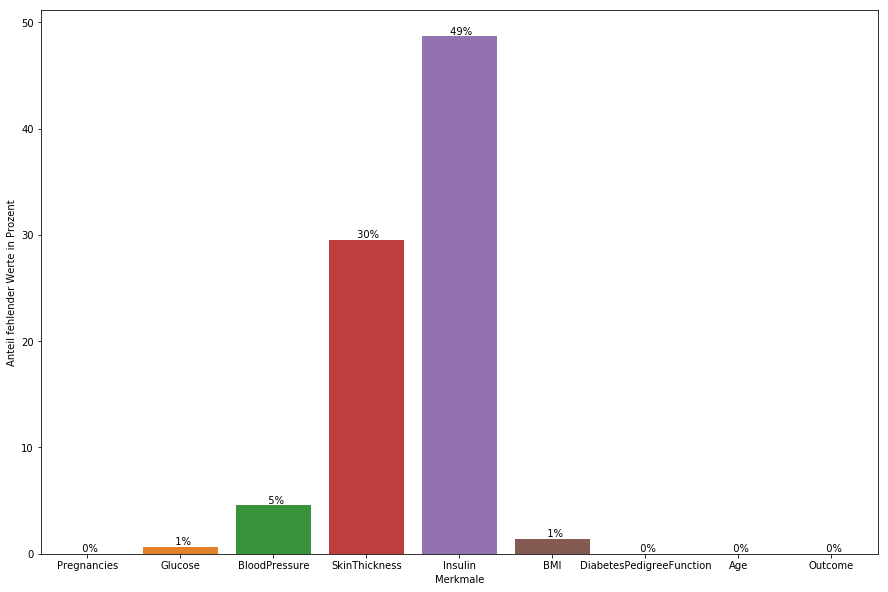

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.barplot(x=df.columns, y=(df.isnull().sum() / df.shape[0]) * 100);
ax.set(xlabel='Merkmale', ylabel='Anteil fehlender Werte in Prozent');

for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:3.0f}%'.format(y), (x.mean(), y), ha='center', va='bottom')

### Fehlende Werte ersetzen

In [40]:
from sklearn.preprocessing import Imputer

df_tmp = df.copy()

# Imputer für die Klasse Outcome == 0
imp_outcome_0 = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputed_data_outcome_0 = imp_outcome_0.fit_transform(df_tmp[df_tmp['Outcome'] == 0].values)

# Imputer für die Klasse Outcome == 1
imp_outcome_1 = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputed_data_outcome_1 = imp_outcome_1.fit_transform(df_tmp[df_tmp['Outcome'] == 1].values)

imputed_data = np.concatenate((imputed_data_outcome_0, imputed_data_outcome_1), axis=0)

df = pd.DataFrame(imputed_data, columns=df_tmp.columns)

In [41]:
print('Anzahl fehlender Werte pro Merkmal:')
print(df.isnull().sum())

Anzahl fehlender Werte pro Merkmal:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Aufteilung in Trainings- und Testdaten (Sampling)

In [44]:
from sklearn.model_selection import train_test_split

df_X = df.drop('Outcome', axis=1)
df_y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.33, random_state=random_state)

# Trainieren des Models

In [45]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=random_state)
clf = clf.fit(X_train, y_train)

# Evaluieren des Models

In [46]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

Accuracy: 83.07%
